In [1]:
import math
import numpy as np
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nLenslet = 30
n = 8
nPx = n*nLenslet+1
D = 25.5
n_radius = nPx
#onAxis = ceo.Source("R",zenith=0.*math.pi/180/3600,azimuth=0*math.pi/4,
#                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,-25])
src    = ceo.Source("R",zenith=0*60*math.pi/180/3600,azimuth=0*math.pi/4,
                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])
M1 = ceo.GMT_M1(D,nPx,radial_order = 10)
M2 = ceo.GMT_M2(D,nPx,radial_order = 10)

In [6]:
def optical_system(_src_):
    _src_.reset()
    _src_.stop(M2)
    _src_.trace(M1)
    _src_.trace(M2)
    #rays.to_z_plane(5.83001949259)
#    _src_.rays.to_sphere(radius,sphere_distance=x)
    _src_.rays.to_sphere(focal_plane_distance=-5.830,focal_plane_radius=2.197173)
    _src_.opd2phase();
def opd_res_fun(x,radius):
    optical_system(x,src,radius)
    return src.wavefront.rms()*1e9

In [7]:
n = nPx
R = D/2
u = np.linspace(-1,1,n)*R
x,y = np.meshgrid(u,u)
xy = np.array( [ x.flatten(), y.flatten()] )

In [8]:
def ROT(o):
    return np.array([ [ math.cos(o), math.sin(o)], [-math.sin(o),math.cos(o)] ])
rc = 4.387
xy_rc = np.array([[0],[rc]])
print xy_rc
rp = 7.543
xy_rp = np.array([[rp],[0]])
print xy_rp
W = 1.5
L = 1.5
xySrc = 82.5*np.array( [[src.zenith*math.cos(src.azimuth)],[src.zenith*math.sin(src.azimuth)]] )
print xySrc

[[ 0.   ]
 [ 4.387]]
[[ 7.543]
 [ 0.   ]]
[[ 0.]
 [ 0.]]


In [9]:
M = []
for k in range(6):
    theta = -k*math.pi/3
    #print ROT(theta)
    xyp = np.dot(ROT(theta),xy) - xy_rc - xySrc
    M.append( np.logical_and( np.abs(xyp[0,:])<L/2,  np.abs(xyp[1,:])<W/2 ) )
for k in range(6):
    theta = (1-k)*math.pi/3
    #print ROT(theta)
    xyp = np.dot(ROT(theta),xy) - xy_rp - xySrc
    M.append( np.logical_and( np.abs(xyp[0,:])<L/2,  np.abs(xyp[1,:])<W/2 ) )
M = np.array( M )
print M.shape

(12, 58081)


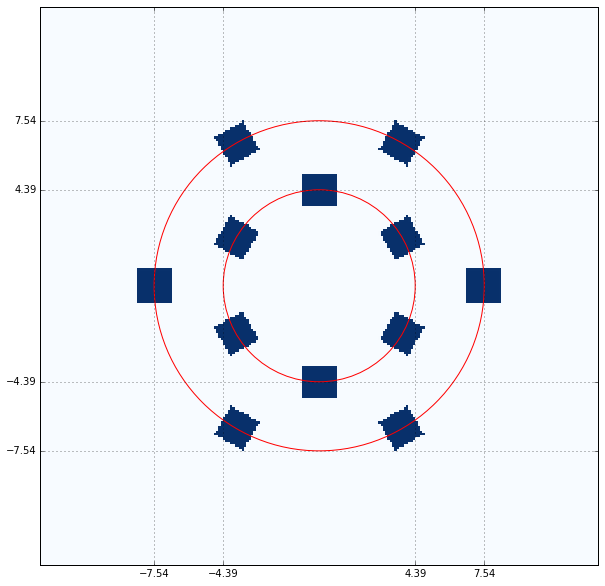

In [10]:
fig,ax =subplots()
fig.set_size_inches((10,10))
ax.imshow(M.sum(axis=0).reshape((n,n)),extent=[-R,R,-R,R],interpolation='None',cmap='Blues',origin='lower')
#ax.imshow(M[7,:].reshape((n,n)),extent=[-R,R,-R,R],interpolation='None',cmap='Blues',origin='lower')
grid()
xticks([-rp,-rc,rc,rp])
yticks([-rp,-rc,rc,rp])
c1 = Circle((0,0),radius=rc, color='r', fill=False)
ax.add_patch(c1)
c2 = Circle((0,0),radius=rp, color='r', fill=False)
ax.add_patch(c2)

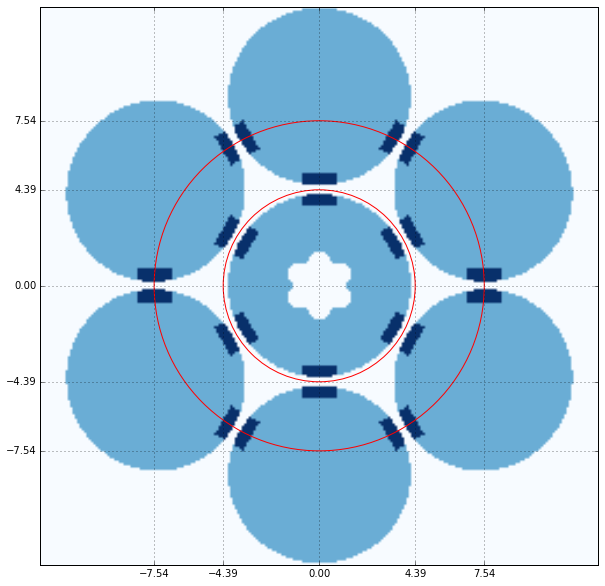

In [22]:
fig,ax =subplots()
fig.set_size_inches((10,10))
P = M1.piston_mask.sum(axis=0)
optical_system(src)
P = src.wavefront.amplitude.host().flatten()
ax.imshow(P.reshape(nPx,nPx) + np.logical_and(P,M.sum(axis=0)).reshape(nPx,nPx),
          extent=[-R,R,-R,R],interpolation=None,cmap='Blues',origin='lower')
grid()
xticks([-rp,-rc,0,rc,rp])
yticks([-rp,-rc,0,rc,rp])
c1 = Circle((0,0),radius=rc, color='r', fill=False)
ax.add_patch(c1)
c2 = Circle((0,0),radius=rp, color='r', fill=False)
ax.add_patch(c2)

In [12]:
src.wavefront.piston(mask=M1.piston_mask)*1e9

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [13]:
P = M1.piston_mask
P.shape

(7, 58081)

In [14]:
P[1,:].shape

(58081,)

In [15]:
M.shape

(12, 58081)

In [16]:
W = (P * np.array([arange(1,8)]).T**2).sum(axis=0)

<matplotlib.colorbar.Colorbar instance at 0x2b9706a83b90>

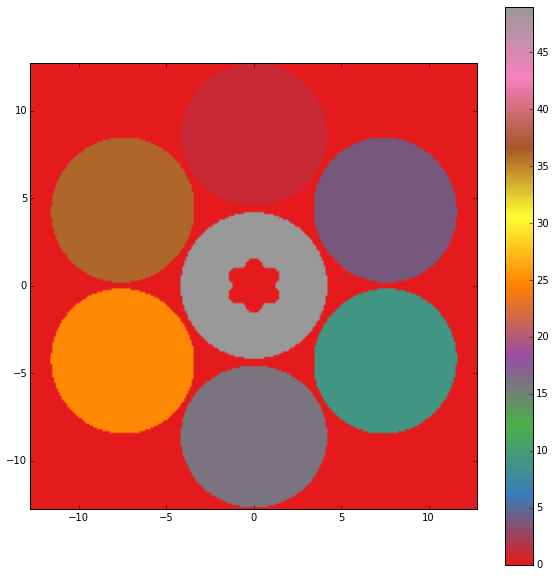

In [17]:
fig, ax =subplots()
fig.set_size_inches((10,10))
h = ax.imshow(W.reshape(nPx,nPx),extent=[-R,R,-R,R],interpolation=None,cmap='Set1',origin='lower')
colorbar(h)

<matplotlib.colorbar.Colorbar instance at 0x2b9706c879e0>

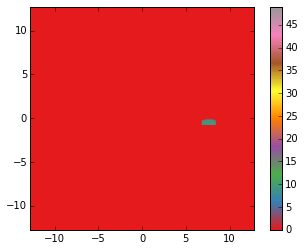

In [18]:
imshow((W*P[2,:]*M[7,:]).reshape(nPx,nPx),
       extent=[-R,R,-R,R],interpolation=None,cmap='Set1',clim=[0,49],origin='lower')
colorbar()

In [19]:
(W*P[0,:]*M[0,:]).shape

(58081,)

In [20]:
(W*P[6,:]*M[0,:]).T.shape

(58081,)

In [ ]:
print np.sum( W*P[0,:]*M[0,:] )/np.sum( P[0,:]*M[0,:] ) - np.sum( W*P[6,:]*M[0,:] )/np.sum( P[6,:]*M[0,:] )
print np.sum( W*P[0,:]*M[6,:] )/np.sum( P[0,:]*M[6,:] ) - np.sum( W*P[1,:]*M[6,:] )/np.sum( P[1,:]*M[6,:] )

In [ ]:
print np.sum( W*P[1,:]*M[1,:] )/np.sum( P[1,:]*M[1,:] ) - np.sum( W*P[6,:]*M[1,:] )/np.sum( P[6,:]*M[1,:] )
print np.sum( W*P[1,:]*M[6,:] )/np.sum( P[1,:]*M[6,:] ) - np.sum( W*P[2,:]*M[7,:] )/np.sum( P[2,:]*M[7,:] )

In [ ]:
for k in range(6):
    print k,(k+1)%6
    print np.sum( W*P[k,:]*M[k,:] )/np.sum( P[k,:]*M[k,:] ) - \
        np.sum( W*P[6,:]*M[k,:] )/np.sum( P[6,:]*M[k,:] )
    print np.sum( W*P[k,:]*M[k+6,:] )/np.sum( P[k,:]*M[k+6,:] ) - \
        np.sum( W*P[(k+1)%6,:]*M[k+6,:] )/np.sum( P[(k+1)%6,:]*M[k+6,:] )

In [ ]:
print range(7)
print np.roll(np.array(range(7)),1)

In [ ]:
for k in range(6):
    print np.sum( W*P[k,:]*M[k,:] )/np.sum( P[k,:]*M[k,:] ) - \
        np.sum( W*P[6,:]*M[k,:] )/np.sum( P[6,:]*M[k,:] )
    print np.sum( W*P[k,:]*M[k+6,:] )/np.sum( P[k,:]*M[k+6,:] ) - \
        np.sum( W*np.roll(P,-2,axis=0)[k,:]*M[k+6,:] )/np.sum( np.roll(P,-2,axis=0)[k,:]*M[k+6,:] )

In [ ]:
k = 5

In [ ]:
np.sum( W*P[0,:]*M[11,:] )/np.sum( P[0,:]*M[k+6,:] )

In [ ]:
np.sum( P[0,:]*M[11,:] )

In [ ]:
np.sum( np.roll(P,-2,axis=0)[5,:]*M[11,:] )

In [ ]:
plot(P[0,:],'.')
plot(np.roll(P,1,axis=0)[5,:])

In [ ]:
P.shape

In [ ]:
print a[0:15]

In [ ]:
a = np.random.normal(size=(4,3))
print a

In [ ]:
print roll(a,-1,axis=0)

In [ ]:
P.shape

In [ ]:
print P